In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install plotly

In [3]:
import plotly.express as px
import plotly.graph_objects as go 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('C:\\Users\\admin\\Desktop\\Progress\\1 my resume Projects\\ML Sleeping Disorder\\sleep_disorder.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.shape

(374, 13)

In [8]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [13]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [14]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [15]:
#filtering the data types
num_col=df.select_dtypes(include=['int64','float64']).columns

for column in num_col:
    unique_values=df[column].unique()
    print(column)

Person ID
Age
Sleep Duration
Quality of Sleep
Physical Activity Level
Stress Level
Heart Rate
Daily Steps


In [16]:
num_col

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [17]:
obj_col=df.select_dtypes(include=['object']).columns

for column in obj_col:
    unique_values=df[column].unique()
    print(column)

Gender
Occupation
BMI Category
Blood Pressure
Sleep Disorder


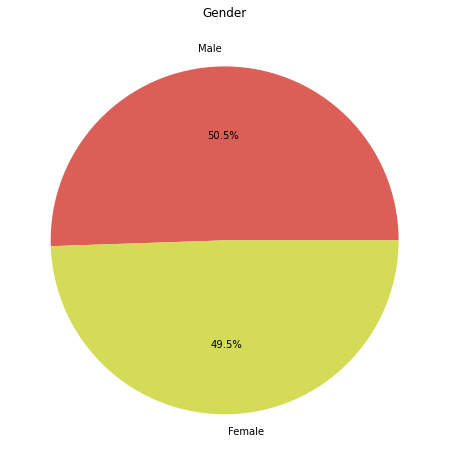

In [18]:
plt.figure(figsize=(18,8))
counts=df['Gender'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=sns.color_palette('hls'))
plt.title('Gender')
plt.show()

In [19]:
# Occupation
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

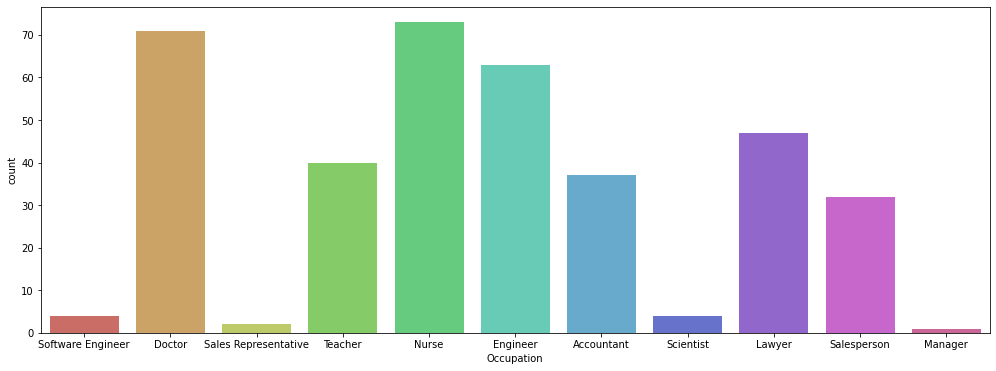

In [20]:
plt.figure(figsize=(17,6))
sns.countplot(df['Occupation'],data=df,palette='hls')
plt.xticks(rotation=0)
plt.show()

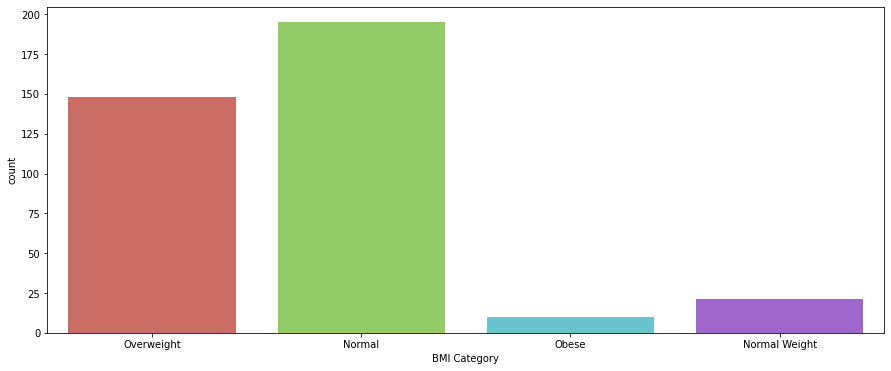

In [21]:
# BMI Category
plt.figure(figsize=(15,6))
sns.countplot(df['BMI Category'], data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

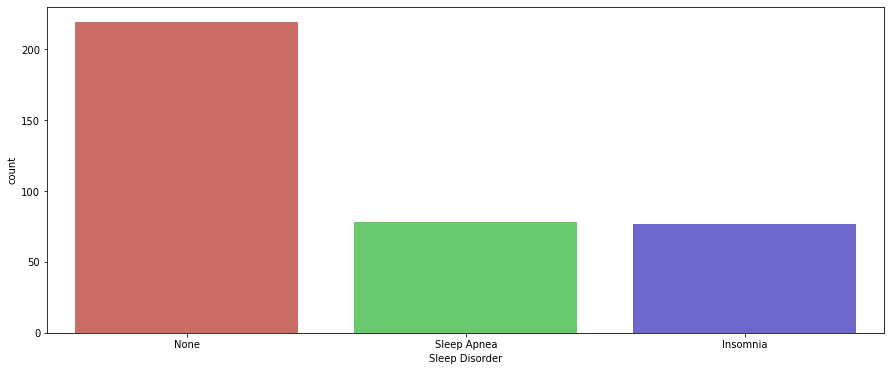

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(df['Sleep Disorder'], data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

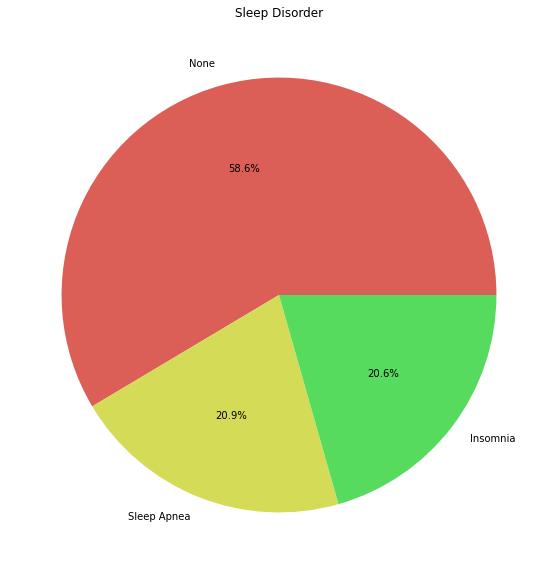

In [23]:
plt.figure(figsize=(20, 10))
counts = df['Sleep Disorder'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Sleep Disorder')
plt.show()

0.2572221422742844


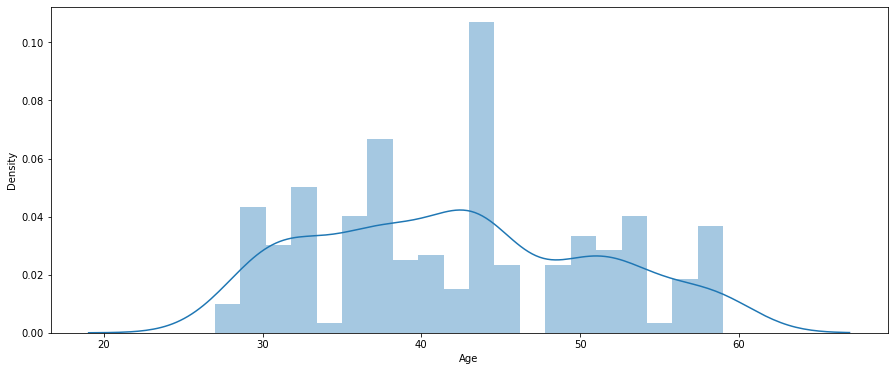

0.037554389846484834


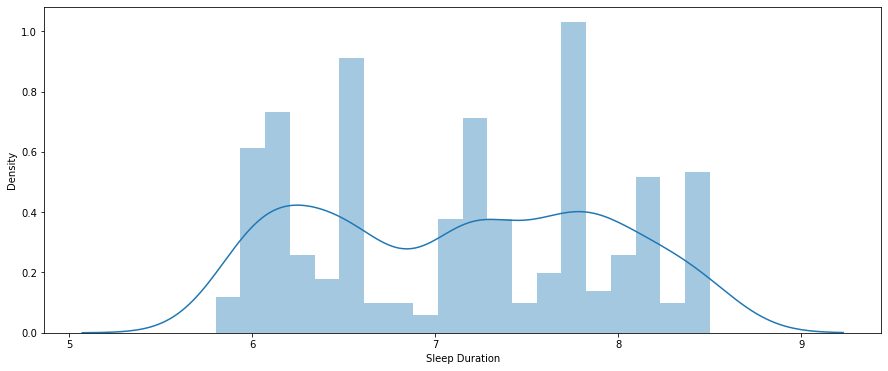

-0.20744763173836073


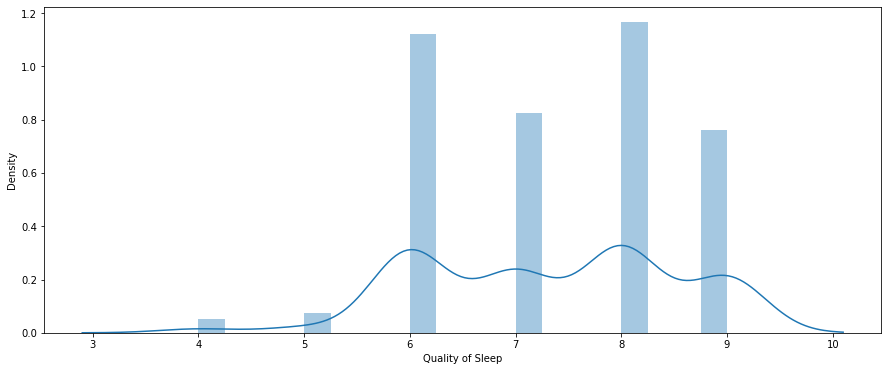

0.07448690272010197


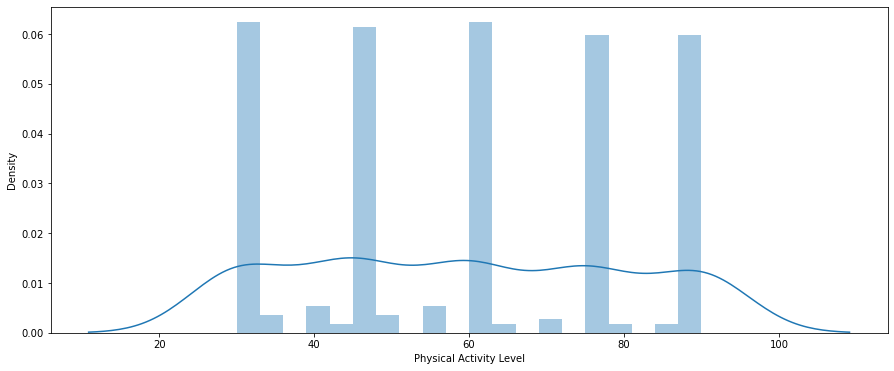

0.15432958161578225


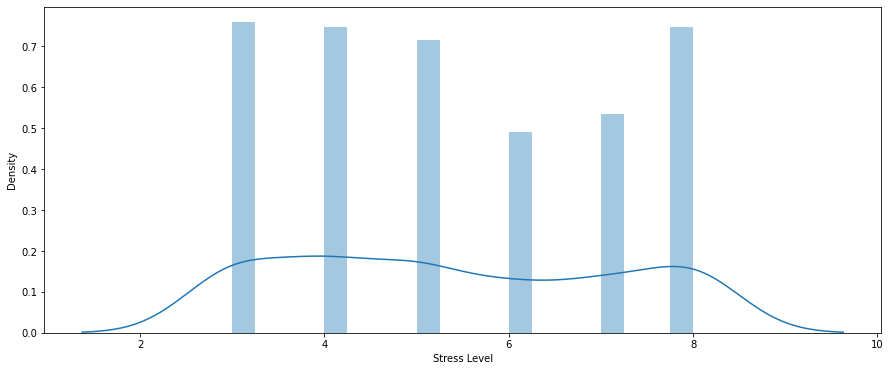

1.2248235470533522


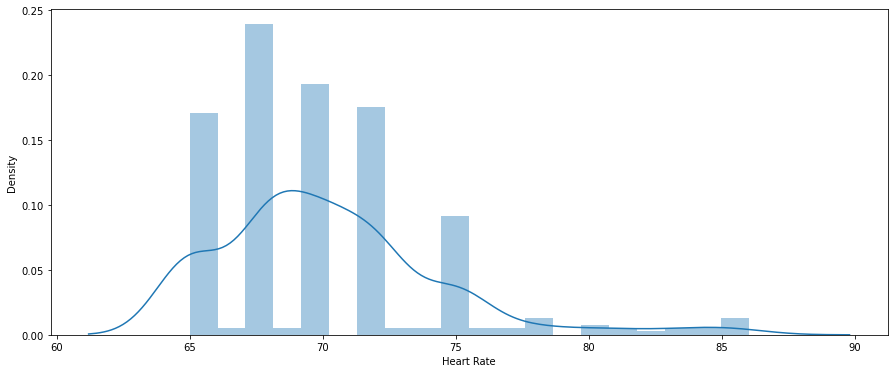

0.17827733092832274


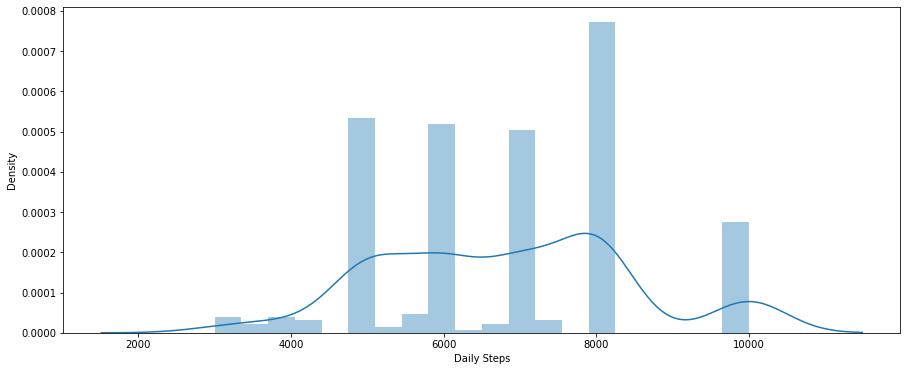

In [24]:
for i in num_col:
    if i != 'Person ID':
        plt.figure(figsize=(15,6))
        print(df[i].skew())
        sns.distplot(df[i], kde = True, bins = 20)
        plt.xticks(rotation = 0)
        plt.show()

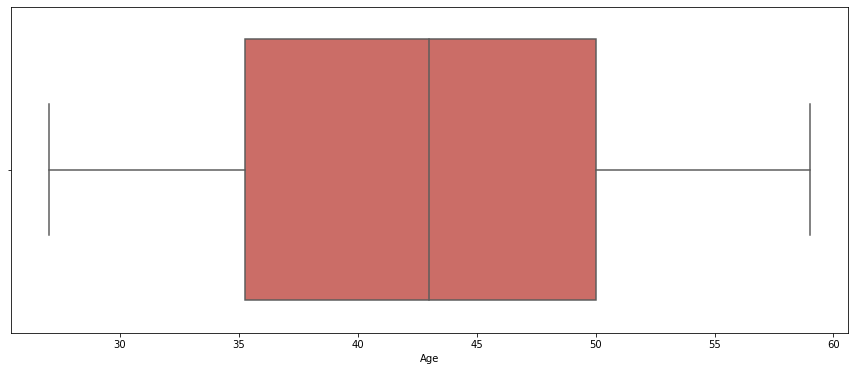

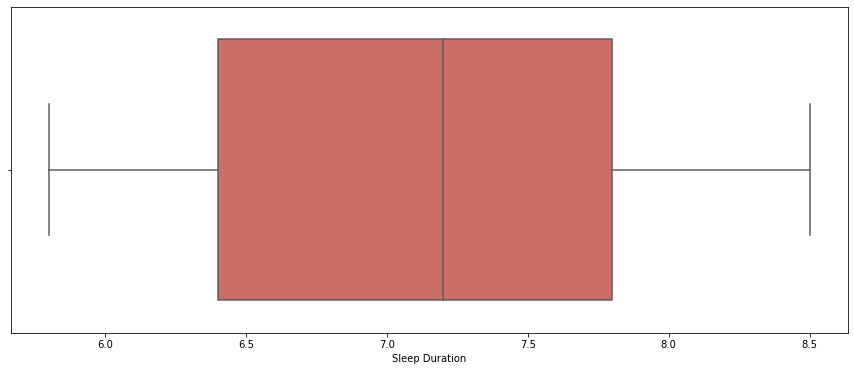

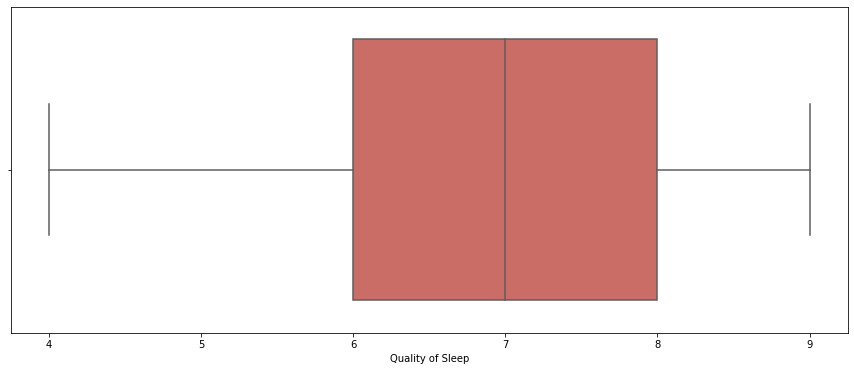

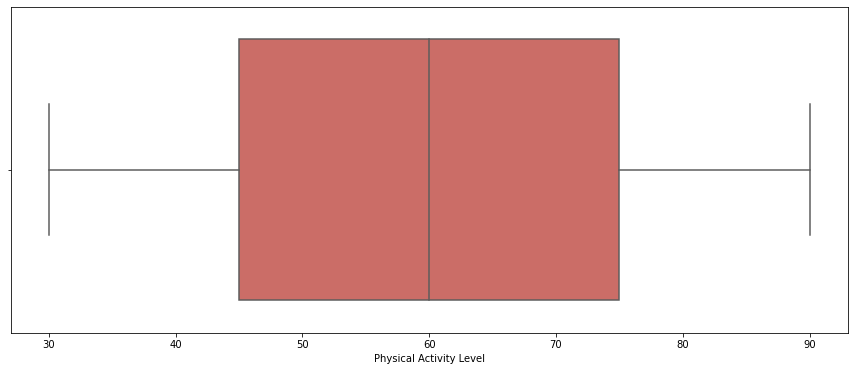

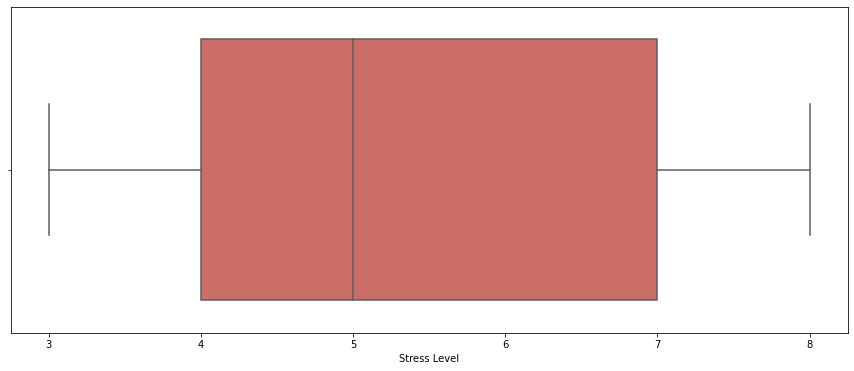

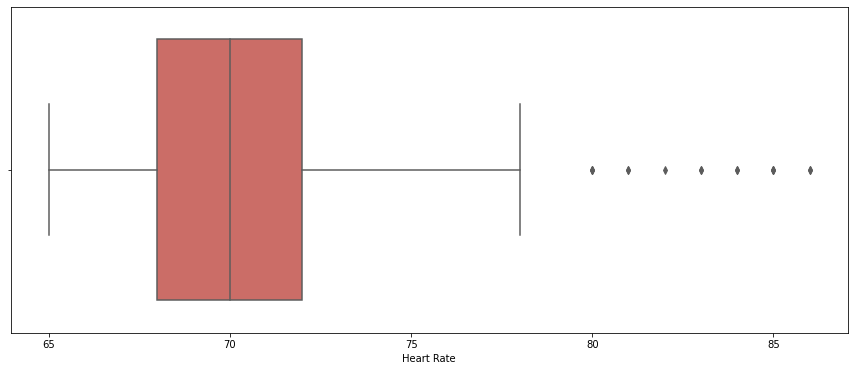

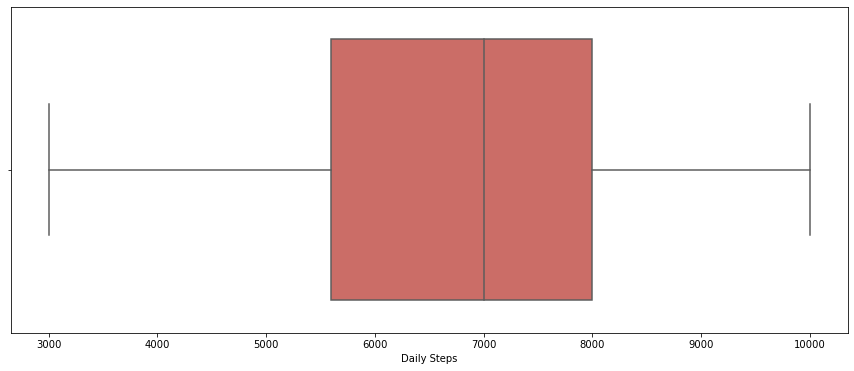

In [25]:
for i in num_col:
    if i != 'Person ID':
        plt.figure(figsize=(15,6))
        sns.boxplot(df[i], data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()
# only hearrate have outlier

In [26]:
# Data Cleaning () heartrate have outlier and it is not normal
# now removing outlier using winsorizer
from feature_engine.outliers import Winsorizer
wi = Winsorizer(capping_method='iqr',tail='both',fold=1.5)
df['Heart Rate']=wi.fit_transform(df[['Heart Rate']])

<AxesSubplot:xlabel='Daily Steps'>

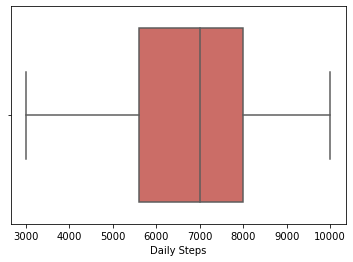

In [27]:
sns.boxplot(df[i], data = df['Heart Rate'], palette = 'hls')    # removed outlier

In [28]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,78.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,78.0,3000,Sleep Apnea


In [29]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [30]:
# Split the blood pressure values into systolic and diastolic columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [31]:
average_systolic = df['Systolic'].mean()
average_diastolic = df['Diastolic'].mean()

print(f"Average Systolic Pressure: {average_systolic}")
print(f"Average Diastolic Pressure: {average_diastolic}")

Average Systolic Pressure: 128.55347593582889
Average Diastolic Pressure: 84.64973262032086


In [32]:
df_selected = df.drop(['Person ID', 'Blood Pressure'], axis = 1)      # removing these two features

In [33]:
df_selected.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,78.0,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,78.0,3000,Sleep Apnea,140,90


### Feature Encoding


In [34]:
# gender,occupation,bmi,sleep have to encoding
dfencoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI Category'])

In [35]:
dfencoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77.0,4200,None,126,83,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75.0,10000,None,125,80,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75.0,10000,None,125,80,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,78.0,3000,Sleep Apnea,140,90,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,78.0,3000,Sleep Apnea,140,90,...,0,1,0,0,0,0,0,0,1,0


In [36]:
# Assuming X is the feature matrix and y is the target variable
X = dfencoded.drop('Sleep Disorder', axis=1)  # Drop the target variable from the feature matrix
y = dfencoded['Sleep Disorder']            

In [37]:
# X= input variables
# y= output variable (or target variable)

In [38]:
dfencoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77.0,4200,None,126,83,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75.0,10000,None,125,80,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75.0,10000,None,125,80,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,78.0,3000,Sleep Apnea,140,90,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,78.0,3000,Sleep Apnea,140,90,...,0,1,0,0,0,0,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.2, random_state=45)

## Scaling 

In [40]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaled_X_train=sc.fit_transform(X_train)   # let here think only fit

scaled_X_test=sc.fit_transform(X_test)

In [41]:
pd.DataFrame(scaled_X_train).head(4)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.355764,1.069041,1.404372,1.023497,-1.353791,-0.812342,0.450529,-1.767311,-1.084221,1.037492,...,-0.474773,0.0,-0.315063,-0.100673,-0.116445,-0.346194,-1.051491,3.951090,-0.154831,-0.801784
1,1.028707,1.704515,1.404372,-1.405278,-1.353791,-1.377202,-1.135765,-0.443599,-0.749840,1.037492,...,-0.474773,0.0,-0.315063,-0.100673,-0.116445,-0.346194,0.951030,-0.253095,-0.154831,-0.801784
2,1.028707,1.704515,1.404372,-1.405278,-1.353791,-1.377202,-1.135765,-0.443599,-0.749840,1.037492,...,-0.474773,0.0,-0.315063,-0.100673,-0.116445,-0.346194,0.951030,-0.253095,-0.154831,-0.801784
3,-0.355764,0.052283,0.561185,0.051987,-0.203838,-0.529911,0.767787,0.218258,0.086111,-0.963863,...,-0.474773,0.0,-0.315063,-0.100673,-0.116445,-0.346194,0.951030,-0.253095,-0.154831,-0.801784


In [42]:
pd.DataFrame(scaled_X_test).head(4)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.627583,0.336525,-0.184543,0.225126,-0.267659,2.117790,-1.944046,1.508289,0.990626,-1.098127,...,-0.561951,-0.165521,-0.267261,-0.116248,0.0,-0.345547,-1.013423,-0.204124,4.898979,-0.839372
1,-0.183947,0.826610,0.629617,1.381598,-0.267659,-0.088241,0.610921,0.076369,-0.045387,-1.098127,...,-0.561951,-0.165521,-0.267261,-0.116248,0.0,-0.345547,0.986754,-0.204124,-0.204124,-0.839372
2,1.902843,1.194173,1.443777,0.687715,-1.324206,-0.639749,0.043151,1.269635,1.434631,0.910642,...,1.779513,-0.165521,-0.267261,-0.116248,0.0,-0.345547,-1.013423,-0.204124,-0.204124,1.191367
3,-1.227342,0.581567,0.629617,-0.700051,-1.324206,-0.088241,0.610921,-1.116897,-0.785396,-1.098127,...,-0.561951,-0.165521,-0.267261,-0.116248,0.0,-0.345547,0.986754,-0.204124,-0.204124,-0.839372


## 1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [44]:
y_pred=log_model.predict(scaled_X_test)    #same is here y=mx+c we put x values
pd.DataFrame(y_pred).head(4)    


# now check these values

,0
0,Sleep Apnea
1,None
2,Sleep Apnea
3,None


In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
# top side we write prediction and
# left side we write actual

array([[ 8,  1,  1],
       [ 2, 42,  2],
       [ 2,  1, 16]], dtype=int64)

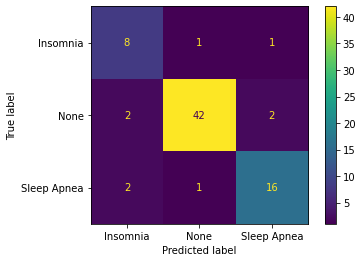

In [47]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(log_model,scaled_X_test,y_test)
plt.show()

In [48]:
y_test.value_counts()       # there are 3 types of output hence the confusion matrix matrix is 3*3

None           46
Sleep Apnea    19
Insomnia       10
Name: Sleep Disorder, dtype: int64

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Insomnia       0.67      0.80      0.73        10
        None       0.95      0.91      0.93        46
 Sleep Apnea       0.84      0.84      0.84        19

    accuracy                           0.88        75
   macro avg       0.82      0.85      0.83        75
weighted avg       0.89      0.88      0.88        75



In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.88

## 2.KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier(n_neighbors=1)    # k is here 1

knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred=knn_model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
# here comparing actual value and predicted value
accuracy_score(y_test,y_pred)    # 1st take test and then 2nd pred

0.88

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Insomnia       0.69      0.90      0.78        10
        None       0.93      0.91      0.92        46
 Sleep Apnea       0.88      0.79      0.83        19

    accuracy                           0.88        75
   macro avg       0.84      0.87      0.85        75
weighted avg       0.89      0.88      0.88        75



In [55]:
test_ac=[]

for k in range(1,55):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    y_pred_test=knn_model.predict(X_test)
    test_ac_score = accuracy_score(y_test,y_pred_test)
    
    test_ac.append(test_ac_score)
    
print(test_ac,end=',')

#0.64

[0.88, 0.84, 0.92, 0.88, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8533333333333334, 0.8933333333333333, 0.88, 0.8933333333333333, 0.8533333333333334, 0.8533333333333334, 0.84, 0.8533333333333334, 0.84, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.7066666666666667, 0.68, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64],

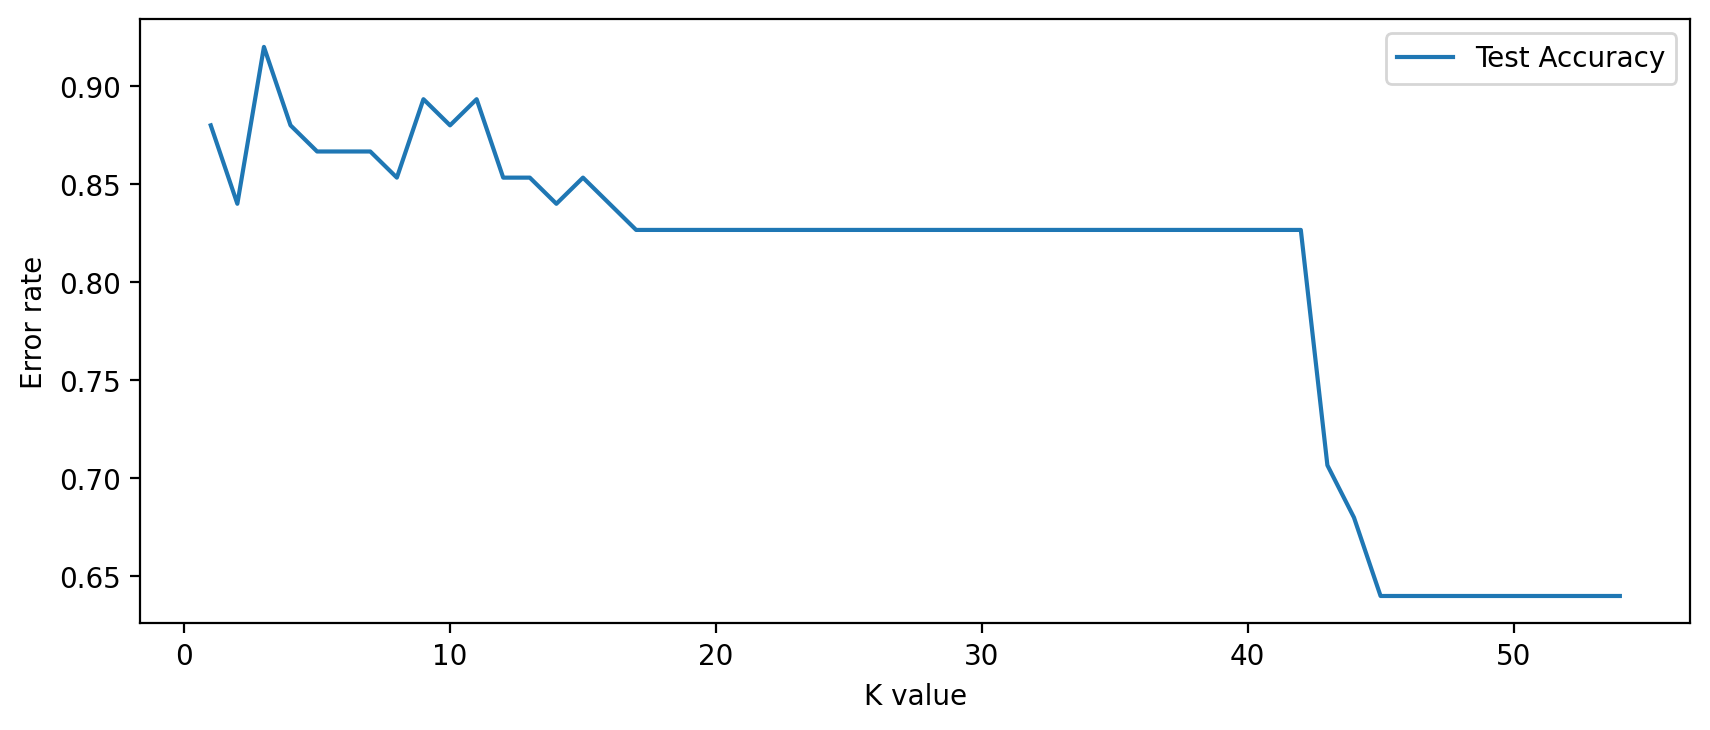

In [56]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,55),test_ac,label='Test Accuracy')

plt.ylabel('Error rate')
plt.xlabel('K value')

plt.legend()
plt.show()

In [57]:
param_grid ={'n_neighbors': list(range(1,55))}

In [58]:
from sklearn.model_selection import GridSearchCV
full_cv_classifier= GridSearchCV(knn_model,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=54),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [59]:
full_cv_classifier.best_params_

{'n_neighbors': 1}

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.88

In [62]:
y_pred_train=knn_model.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.725752508361204

## 3.Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

#### Prediction

In [64]:
y_pred_train= model.predict(X_train)
y_pred_test = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
print('train_accuracy', accuracy_score(y_pred_train,y_train))
print('test_accuracy', accuracy_score(y_pred_test,y_test))

#training accu and test accu is nearly equal model is good model

train_accuracy 0.9364548494983278
test_accuracy 0.88


In [94]:
y_train.value_counts()

None           173
Insomnia        67
Sleep Apnea     59
Name: Sleep Disorder, dtype: int64

In [95]:
y_pred_train

array(['None', 'None', 'None', 'None', 'Insomnia', 'None', 'None', 'None',
       'None', 'Sleep Apnea', 'None', 'None', 'Insomnia', 'None', 'None',
       'Sleep Apnea', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea',
       'None', 'Sleep Apnea', 'Sleep Apnea', 'None', 'Insomnia',
       'Insomnia', 'None', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'None', 'Sleep Apnea', 'Insomnia',
       'None', 'Sleep Apnea', 'Insomnia', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'None',
       'Insomnia', 'Insomnia', 'None', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'Sleep Apnea', 'Insomnia', 'None', 'None', 'None',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'None', 'None',
       'Sleep Apnea', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea',
       'None', 'Sleep Apnea', 'None', 'None', 'Insomnia', 'Sleep Apnea',
       'None', 'None', 'Sleep Apnea', 'None', 'None', 'None', 'None',
       'None', 'I

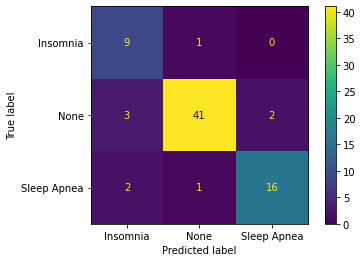

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

    Insomnia       0.64      0.90      0.75        10
        None       0.95      0.89      0.92        46
 Sleep Apnea       0.89      0.84      0.86        19

    accuracy                           0.88        75
   macro avg       0.83      0.88      0.85        75
weighted avg       0.90      0.88      0.88        75



In [68]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,X,y,cv=5)
print('cross val score',scores.mean())

cross val score 0.7462342342342343


In [69]:
model.feature_importances_

array([0.08803231, 0.10355146, 0.02600885, 0.04574888, 0.02385342,
       0.05218917, 0.06547879, 0.12336001, 0.13654503, 0.00759416,
       0.00817511, 0.00459148, 0.0059309 , 0.00827667, 0.00328015,
       0.        , 0.04207693, 0.        , 0.01530126, 0.00182532,
       0.00093722, 0.01631533, 0.11240069, 0.00687271, 0.00216966,
       0.0994845 ])

In [70]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.088032
Sleep Duration,0.103551
Quality of Sleep,0.026009
Physical Activity Level,0.045749
Stress Level,0.023853
Heart Rate,0.052189
Daily Steps,0.065479
Systolic,0.123360
Diastolic,0.136545
Gender_Female,0.007594


In [71]:
from sklearn.model_selection import GridSearchCV

# model
estimator = RandomForestClassifier()

# parameters (which you want to tune and identify the best)
param_grid={'n_estimators': list(range(1,101))}

In [72]:
grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5 )

# grid = function( random model , list , score , cv)

In [73]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [74]:
grid.best_params_

{'n_estimators': 11}

## 4.Decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
base_pred=model.predict(X_test)
pd.DataFrame(base_pred)

,0
0,Insomnia
1,None
2,Sleep Apnea
3,None
4,None
...,...
70,None
71,None
72,Insomnia
73,None


In [77]:
pred_train = model.predict(X_train)
pd.DataFrame(pred_train)

,0
0,None
1,None
2,None
3,None
4,Insomnia
...,...
294,None
295,None
296,None
297,None


## Evaluation

In [78]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [79]:
accuracy_score(y_train,pred_train)   # ith y ch vaprtav ani pred ....x ch ajibath nh

0.9364548494983278

In [80]:
accuracy_score(y_test,base_pred)

0.88

In [81]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

    Insomnia       0.64      0.90      0.75        10
        None       0.95      0.89      0.92        46
 Sleep Apnea       0.89      0.84      0.86        19

    accuracy                           0.88        75
   macro avg       0.83      0.88      0.85        75
weighted avg       0.90      0.88      0.88        75



### this model is creating useing DT and we took feature importance using that model

- here we can remove features(columns) which less than 0.05

In [82]:
a=model.feature_importances_
a

array([0.01260577, 0.04581275, 0.00147865, 0.        , 0.00109744,
       0.09562956, 0.03958332, 0.32660711, 0.        , 0.        ,
       0.01559519, 0.0022936 , 0.        , 0.00225078, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0034656 , 0.        , 0.        , 0.        ,
       0.45358023])

In [84]:
pd.DataFrame(index=X.columns,data=a,columns=['feature importane'])

,feature importane
Age,0.012606
Sleep Duration,0.045813
Quality of Sleep,0.001479
Physical Activity Level,0.000000
Stress Level,0.001097
Heart Rate,0.095630
Daily Steps,0.039583
Systolic,0.326607
Diastolic,0.000000
Gender_Female,0.000000


In [85]:
from sklearn.tree import plot_tree

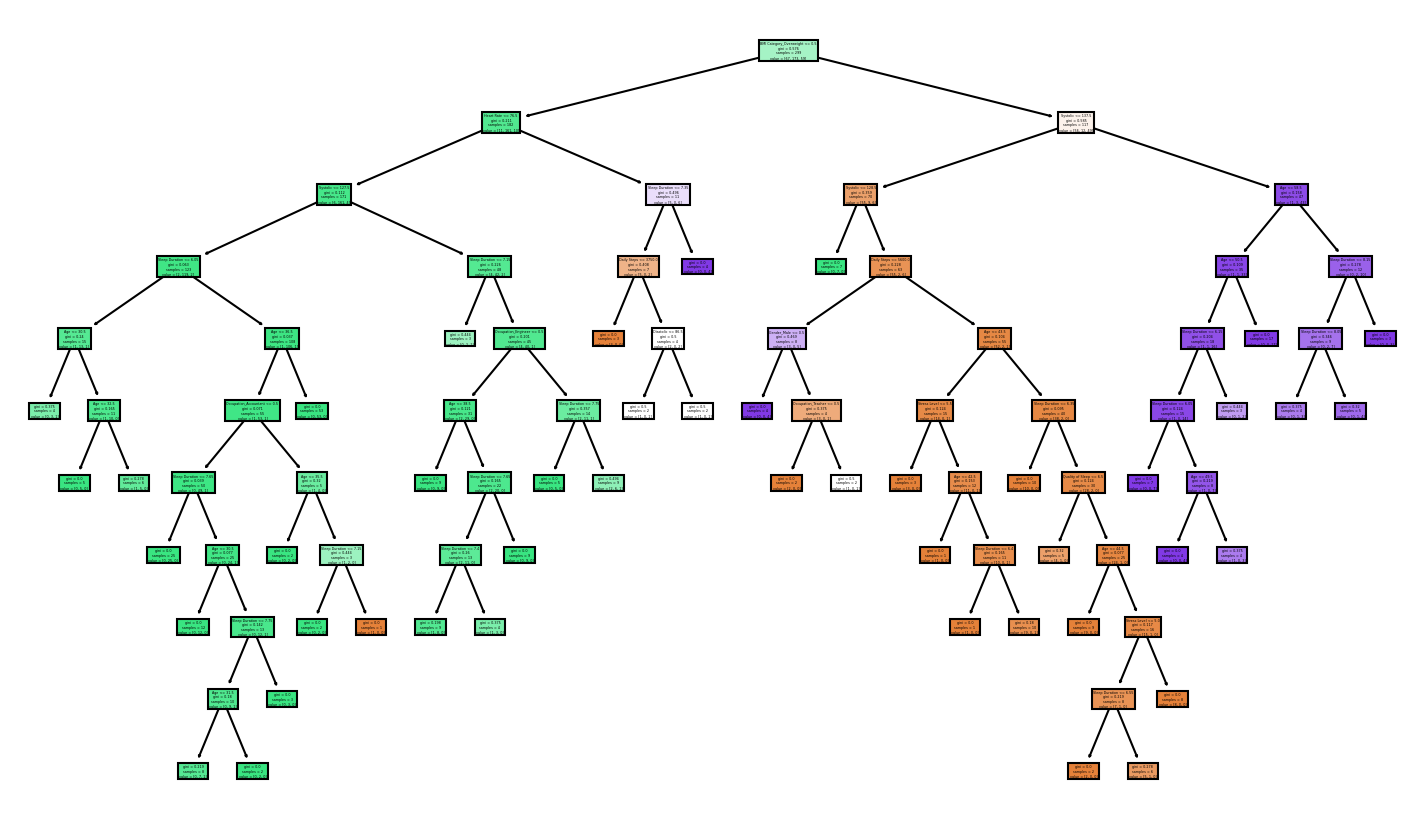

In [86]:
plt.figure(figsize=(12,7),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

### Optmization pruning of DT

In [87]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree

DecisionTreeClassifier(max_depth=2)

In [88]:
def report_model(model):
    model.fit(X_train,y_train)
    model_preds = model.predict(X_test)
    pred_train = model.predict(X_train)
    print('train accuracy',accuracy_score(y_train,pred_train))
    print('test accuracy',accuracy_score(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

train accuracy 0.8862876254180602
test accuracy 0.8666666666666667


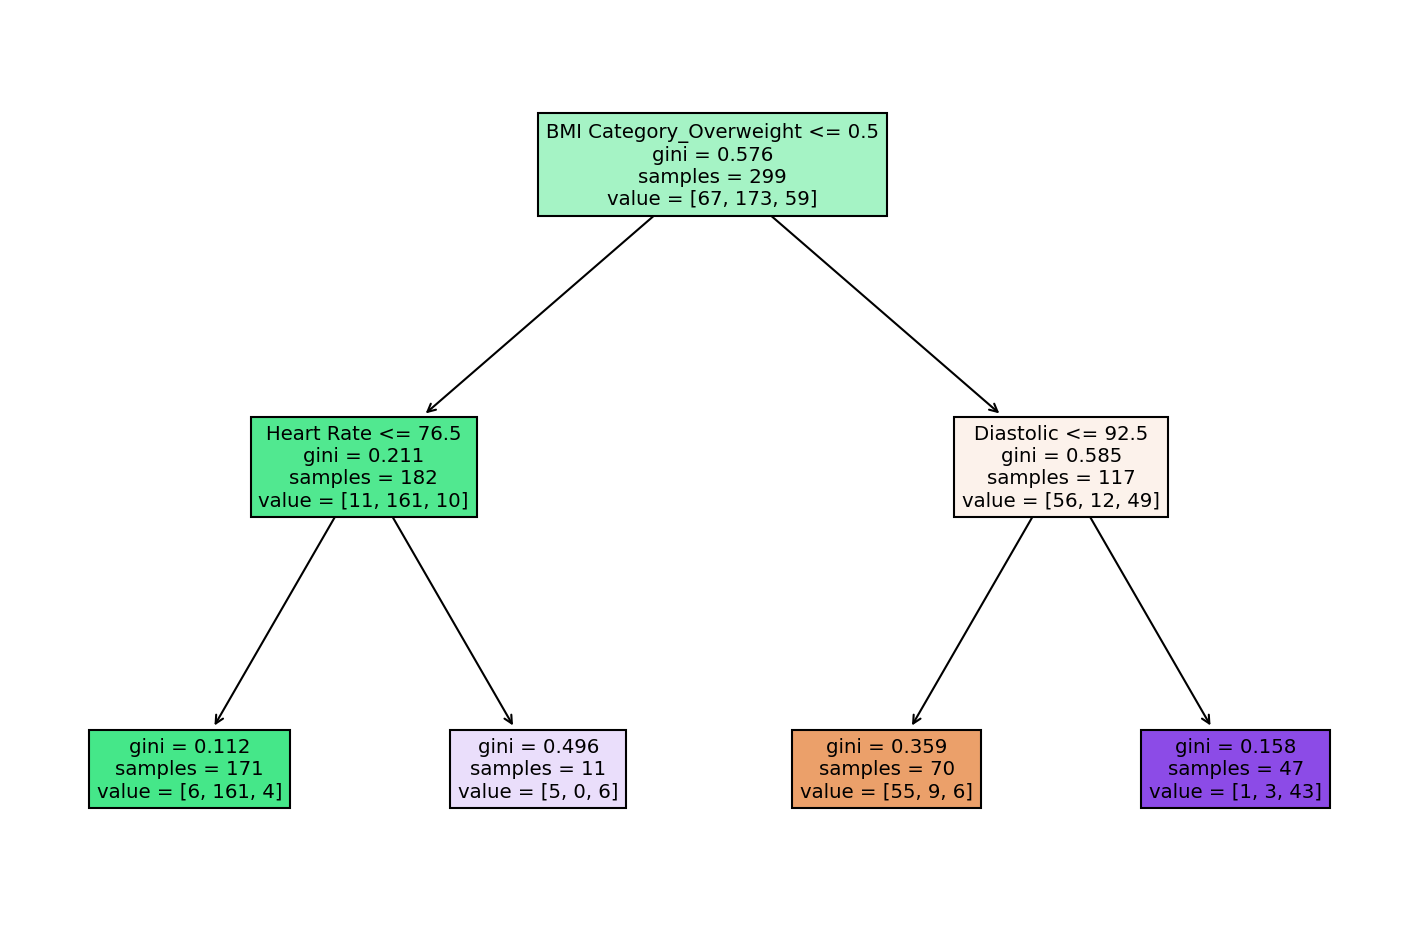

In [89]:
report_model(pruned_tree)

#### Max Leaf nodes

In [90]:
pruned_tree= DecisionTreeClassifier(max_leaf_nodes=3)

train accuracy 0.8662207357859532
test accuracy 0.84


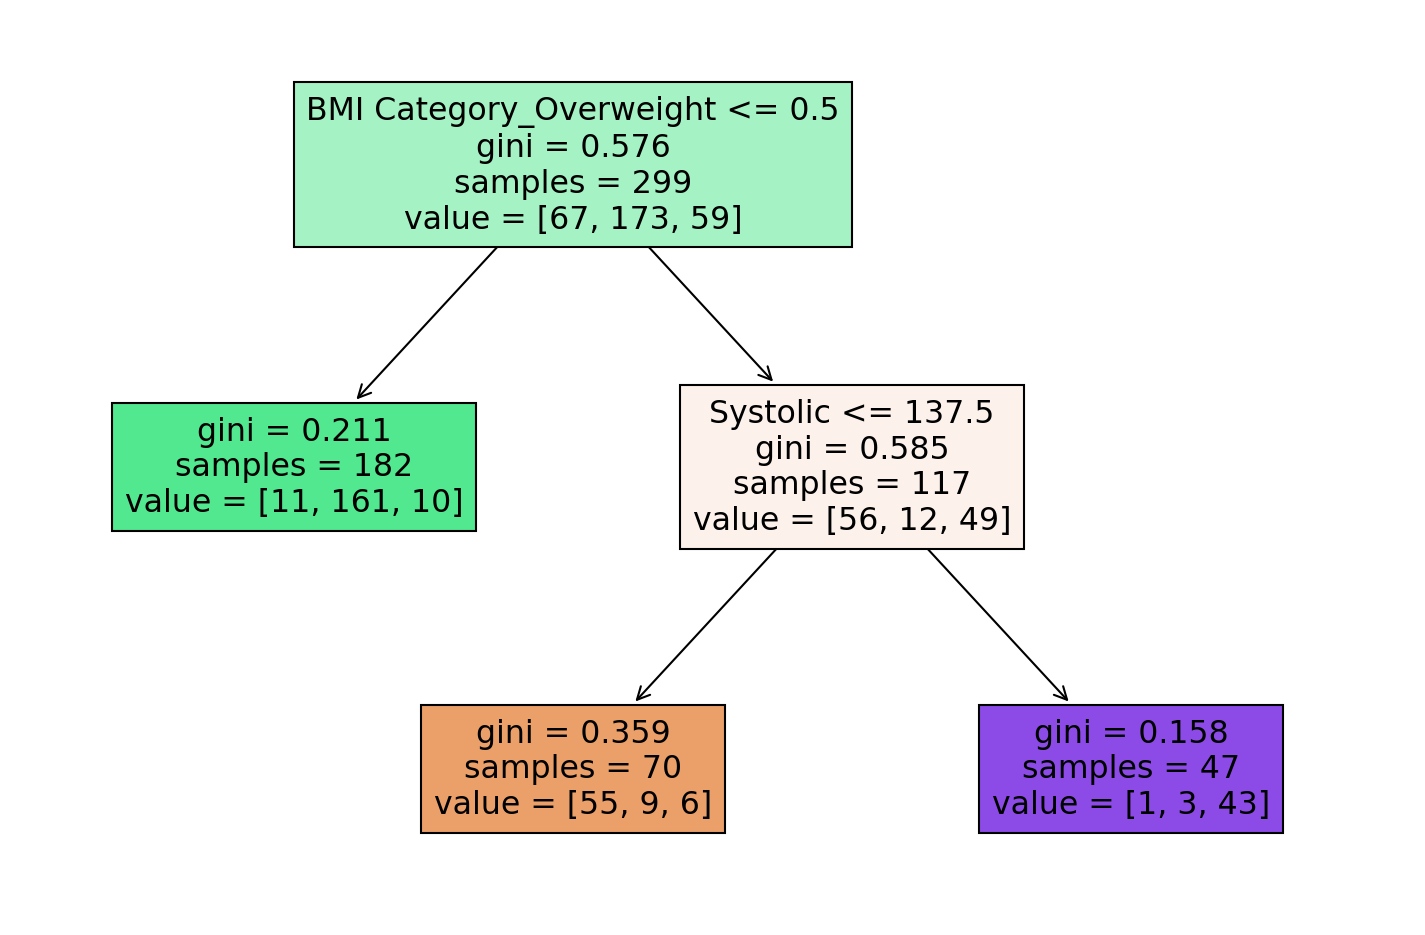

In [91]:
report_model(pruned_tree)

## So here Decision Tree is best model to fit.

In [99]:
X.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight'],
      dtype='object')

In [ ]:
model.predict([[___]])     # make sure here we can write 26 features then we can predict

In [100]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,78.0,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,78.0,3000,Sleep Apnea,140,90
